In [1]:
import pandas as pd
import john_wrangle as jw
import johns_visual as vis

import matplotlib.pyplot as plt
import seaborn as sns
import os
# Set the working directory to the directory containing your notebook
os.chdir('/Users/jongarcia/codeup-data-science/curriculum')

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
df = jw.get_file()

In [4]:
df.head()

,date,time,path,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [5]:
cohorts = pd.read_csv("cohorts.csv")
cohorts.head(5)

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
1,2,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2,3,Carlsbad,#carlsbad,2014-09-04,2014-11-05,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
3,4,Denali,#denali,2014-10-20,2015-01-18,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
4,5,Everglades,#everglades,2014-11-18,2015-02-24,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1


In [6]:
cohorts.head()

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
1,2,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2,3,Carlsbad,#carlsbad,2014-09-04,2014-11-05,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
3,4,Denali,#denali,2014-10-20,2015-01-18,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
4,5,Everglades,#everglades,2014-11-18,2015-02-24,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       900223 non-null  object 
 1   time       900223 non-null  object 
 2   path       900222 non-null  object 
 3   user_id    900223 non-null  int64  
 4   cohort_id  847330 non-null  float64
 5   ip         900223 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 41.2+ MB


In [8]:
df.head()

,date,time,path,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [9]:
# Perform left join
df = df.merge(cohorts, left_on='cohort_id', right_on='id', how='left').drop(columns=['id', 'deleted_at', 'created_at', 'updated_at'])

df['subject'] = df['path'].str.lstrip('/').str.split('/').str[0]

# Show first few rows of the joined dataframe
df.head()

,date,time,path,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,subject
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,java-ii
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,java-ii
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,slides
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2.0,javascript-i


In [10]:
jw.create_info_dataframe(df)

,Column,Null_Count,Null_Percentage,Zero_Count,Blank_Count,Unique_Values,Data_Type
0,date,0,0.0,0,0,1182,object
1,time,0,0.0,0,0,73167,object
2,path,1,0.0,0,0,2313,object
3,user_id,0,0.0,0,0,981,int64
4,cohort_id,52893,6.0,0,0,47,float64
5,ip,0,0.0,0,0,5531,object
6,name,52893,6.0,0,0,47,object
7,slack,52893,6.0,0,0,46,object
8,start_date,52893,6.0,0,0,44,object
9,end_date,52893,6.0,0,0,45,object


In [11]:
df_no_cohort = df[df['cohort_id'].isna()]
df = df[df['cohort_id'].notna()]
df = df[df['path'].notna()]
df['cohort_id'] = df['cohort_id'].astype(int)
df['program_id'] = df['program_id'].astype(int)
df = df[df['path'] != '/']
# Split the 'path' column by forward slashes and take the levels 0 through 2
df['lesson'] = df['path'].str.split('/').apply(lambda x: x[1] if len(x) > 1 else x[0])
df.head()

,date,time,path,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,subject,lesson
1,2018-01-26,09:56:02,java-ii,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1,java-ii,java-ii
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1,java-ii,object-oriented-programming
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1,slides,object_oriented_programming
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2,javascript-i,conditionals
5,2018-01-26,09:56:41,javascript-i/loops,2,22,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2,javascript-i,loops


In [12]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 801475 entries, 2018-01-26 to 2021-04-21
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time        801475 non-null  object
 1   path        801475 non-null  object
 2   user_id     801475 non-null  int64 
 3   cohort_id   801475 non-null  int64 
 4   ip          801475 non-null  object
 5   name        801475 non-null  object
 6   slack       801475 non-null  object
 7   start_date  801475 non-null  object
 8   end_date    801475 non-null  object
 9   program_id  801475 non-null  int64 
 10  subject     801475 non-null  object
 11  lesson      801475 non-null  object
dtypes: int64(3), object(9)
memory usage: 79.5+ MB


In [14]:
# List of common file extensions
file_extensions = ['.txt', '.jpg', '.jpeg', '.png', '.pdf', '.doc', '.xls', '.csv', '.json', '.html', '.svg', '.java', '.zip', '.gif', '.ico']

# Define a function to check if a URL contains a file extension
def contains_file_extension(url):
    for ext in file_extensions:
        if ext in url:
            return False
    return True

# Filter rows where the URL doesn't contain a file extension so that paths that are files can be removed form the data frame
df = df[df['path'].apply(contains_file_extension)]


In [15]:
df.to_csv('df.csv')

In [16]:
# Check if the original DataFrame had any rows where 'path' is just a forward slash
forward_slash_count = df[df['path'] == '/'].shape[0]

forward_slash_count

0

---
---
## 7
---
---

In [17]:
# Group by 'program_id' and 'path', then count the occurrences to identify the most visited lesson per program
traffic_program = df.groupby(['program_id', 'subject']).size().reset_index(name='visit_count')
traffic_program_sorted = traffic_program.sort_values(by='visit_count', ascending=False)
traffic_program_filtered = traffic_program_sorted[traffic_program_sorted['visit_count'] >= 25]

In [18]:
traffic_program_filtered[traffic_program_filtered['subject'] == 'html-css']

,program_id,subject,visit_count
517,2,html-css,79000
52,1,html-css,2463
720,3,html-css,26


In [19]:
traffic_program_filtered[traffic_program_filtered['program_id'] == 2][0:50]

,program_id,subject,visit_count
537,2,javascript-i,110116
517,2,html-css,79000
562,2,mysql,77315
543,2,jquery,56780
608,2,spring,53149
532,2,java-iii,52607
531,2,java-ii,51348
530,2,java-i,38180
538,2,javascript-ii,36068
432,2,appendix,30534


In [20]:
# Group by 'program_id' and 'path', then count the occurrences to identify the most visited lesson per program
traffic_program = df.groupby(['program_id', 'subject']).size().reset_index(name='visit_count')
traffic_program.sort_values('visit_count', ascending=True).head(5)

,program_id,subject,visit_count
589,2,quizzes,1
585,2,quiz115,1
583,2,quic,1
582,2,query,1
369,2,9.5_DBSCAN_to_detect_anomalies,1


In [21]:
traffic_program[traffic_program['visit_count'] >= 10]

,program_id,subject,visit_count
1,1,1-fundamentals,11
42,1,appendix,1073
44,1,assets,11
46,1,content,2224
48,1,git,14
...,...,...,...
760,3,stats,3138
762,3,storytelling,1460
765,3,timeseries,1592
766,3,toc,11


---
---
## 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
---
---

In [22]:
# Group by 'program_id' and 'path', then count the occurrences to identify the most visited lesson per program
traffic_program = df.groupby(['program_id', 'path']).size().reset_index(name='visit_count')
traffic_program= traffic_program[traffic_program['path'] != '/']
traffic_program.sort_values('visit_count', ascending=False).head(5)

,program_id,path,visit_count
1610,2,javascript-i,17457
1984,2,toc,17428
1584,2,java-iii,12683
1500,2,html-css,12569
1572,2,java-ii,11719


In [23]:
# List of common file extensions
file_extensions = ['.txt', '.jpg', '.jpeg', '.png', '.pdf', '.doc', '.xls', '.csv', '.json', '.html', '.svg', '.java', '.zip', '.gif', '.ico']

# Define a function to check if a URL contains a file extension
def contains_file_extension(url):
    for ext in file_extensions:
        if ext in url:
            return False
    return True

# Filter rows where the URL doesn't contain a file extension
traffic_program = traffic_program[traffic_program['path'].apply(contains_file_extension)]
traffic_program.sort_values('visit_count', ascending=False).head(5)

,program_id,path,visit_count
1610,2,javascript-i,17457
1984,2,toc,17428
1584,2,java-iii,12683
1500,2,html-css,12569
1572,2,java-ii,11719


In [24]:
# Sort the DataFrame by 'program_id' and 'visit_count' to get the top 10 most visited lessons per program
traffic_program_sorted = traffic_program.sort_values(['program_id', 'visit_count'], ascending=[True, False])
traffic_program_full_path = traffic_program_sorted.copy()
# Update the 'path' column to only contain the text after the last '/'
# traffic_program_sorted['path'] = traffic_program_sorted['path'].apply(lambda x: x.split('/')[-1])
# traffic_program_sorted['path'] = traffic_program_sorted['path'].str[:15]
traffic_program_sorted.head()

,program_id,path,visit_count
246,1,javascript-i,736
186,1,html-css,542
373,1,spring,501
235,1,java-iii,479
222,1,java-ii,454


In [25]:
traffic_program_sorted[traffic_program_sorted['program_id'] == 1]

,program_id,path,visit_count
246,1,javascript-i,736
186,1,html-css,542
373,1,spring,501
235,1,java-iii,479
222,1,java-ii,454
...,...,...,...
392,1,student/create,1
393,1,students,1
394,1,students/468/notes,1
395,1,students/units/75/sub_units/268,1


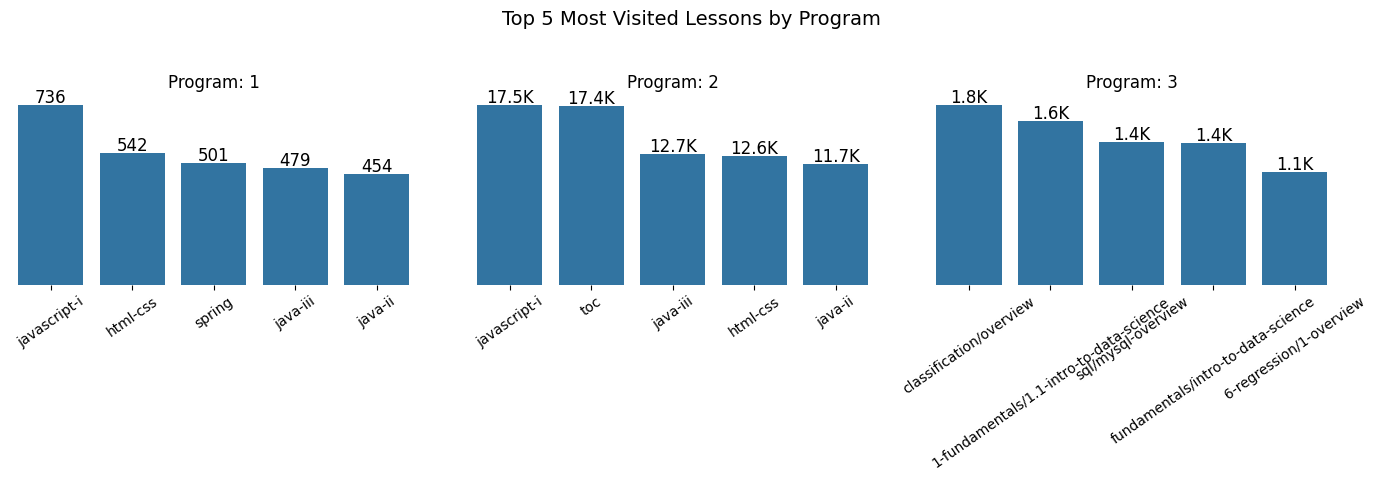

In [26]:
# Create subplots for each program's top 5 most visited lessons using johns_barsubplot
fig, axes = plt.subplots(1, 3, figsize=(14, 5))
fig.suptitle('Top 5 Most Visited Lessons by Program', fontsize=14)

# Flatten axes for easy iteration
axes = axes.flatten()

# Program IDs
program_ids = [1, 2, 3]

for i, program_id in enumerate(program_ids):
    # Get the top 5 most visited lessons for the current program
    top_5_per_program = traffic_program_sorted[traffic_program_sorted['program_id'] == program_id].head()
    
    # Create the bar plot using the top 5 most visited lessons for the current program
    ax = axes[i]
    vis.johns_barsubplot(ax, x='path', y='visit_count', data=top_5_per_program, 
                     title=f'Program: {program_id}', xlabel='', single_color='#1f77b4', x_label_rotation= 35)

# Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [27]:
# Sort the DataFrame by 'program_id' and 'visit_count' to get the top 10 most visited lessons per program
traffic_program_sorted = traffic_program.sort_values(['program_id', 'visit_count'], ascending=[True, False])
traffic_program_full_path = traffic_program_sorted.copy()
# Update the 'path' column to only contain the text after the last '/'
# traffic_program_sorted['path'] = traffic_program_sorted['path'].apply(lambda x: x.split('/')[-1])
# traffic_program_sorted['path'] = traffic_program_sorted['path'].str[:15]
traffic_program_sorted.head(50)

,program_id,path,visit_count
246,1,javascript-i,736
186,1,html-css,542
373,1,spring,501
235,1,java-iii,479
222,1,java-ii,454
214,1,java-i,444
269,1,javascript-ii,429
54,1,appendix,409
278,1,jquery,344
296,1,mysql,284


---
---
## 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
---
---

In [28]:
# Group by 'program_id' and 'path', then count the occurrences to identify the most visited lesson per program
traffic_cohort = df.groupby(['cohort_id', 'path']).size().reset_index(name='visit_count')
traffic_cohort= traffic_cohort[traffic_cohort['path'] != '/']
traffic_cohort.sort_values('visit_count', ascending=False).head(5)

,cohort_id,path,visit_count
9765,62,toc,1866
5091,28,javascript-i,1817
5638,29,toc,1465
5263,28,spring,1403
5077,28,java-iii,1393


In [29]:
# List of common file extensions
file_extensions = ['.txt', '.jpg', '.jpeg', '.png', '.pdf', '.doc', '.xls', '.csv', '.json', '.html', '.svg', '.java', '.zip', '.gif', '.ico']

# Define a function to check if a URL contains a file extension
def contains_file_extension(url):
    for ext in file_extensions:
        if ext in url:
            return False
    return True

# Filter rows where the URL doesn't contain a file extension
traffic_cohort = traffic_cohort[traffic_cohort['path'].apply(contains_file_extension)]
# traffic_cohort.sort_values('visit_count', ascending=False).head(5)

In [30]:
# Sort the DataFrame by 'program_id' and 'visit_count' to get the top 10 most visited lessons per program
traffic_cohort_sorted = traffic_cohort.sort_values(['cohort_id', 'visit_count'], ascending=[True, False])
# Update the 'path' column to only contain the text after the last '/'
# traffic_cohort_sorted['path'] = traffic_cohort_sorted['path'].apply(lambda x: x.split('/')[-1])
traffic_cohort_sorted.head()

,cohort_id,path,visit_count
128,1,javascript-i,294
86,1,html-css,215
150,1,javascript-ii,204
235,1,spring,192
109,1,java-ii,167


---
---
## 5. At some point in 2019, the ability for students and alumni to access both curricula (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
---
---

In [31]:
df.head()

,time,path,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,subject,lesson
date,,,,,,,,,,,,
2018-01-26,09:56:02,java-ii,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1,java-ii,java-ii
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1,java-ii,object-oriented-programming
2018-01-26,09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1,slides,object_oriented_programming
2018-01-26,09:56:24,javascript-i/conditionals,2,22,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2,javascript-i,conditionals
2018-01-26,09:56:41,javascript-i/loops,2,22,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2,javascript-i,loops


In [32]:
df_has_java = df[df['path'].astype(str).str.contains('java', case=False)]
df_has_java.head()

,time,path,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,subject,lesson
date,,,,,,,,,,,,
2018-01-26,09:56:02,java-ii,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1,java-ii,java-ii
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1,java-ii,object-oriented-programming
2018-01-26,09:56:24,javascript-i/conditionals,2,22,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2,javascript-i,conditionals
2018-01-26,09:56:41,javascript-i/loops,2,22,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2,javascript-i,loops
2018-01-26,09:56:46,javascript-i/conditionals,3,22,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2,javascript-i,conditionals


In [33]:
df_has_java[df_has_java['program_id'] == 3]

,time,path,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,subject,lesson
date,,,,,,,,,,,,
2019-09-23,11:45:09,java-iii,476,34,97.105.19.58,Bayes,#,2019-08-19,2020-01-30,3,java-iii,java-iii
2019-09-25,19:30:44,javascript-i,476,34,136.50.49.145,Bayes,#,2019-08-19,2020-01-30,3,javascript-i,javascript-i
2019-09-25,19:31:07,javascript-i,476,34,136.50.49.145,Bayes,#,2019-08-19,2020-01-30,3,javascript-i,javascript-i
2019-09-25,19:31:11,java-i,476,34,136.50.49.145,Bayes,#,2019-08-19,2020-01-30,3,java-i,java-i
2019-09-25,19:31:12,javascript-i,476,34,136.50.49.145,Bayes,#,2019-08-19,2020-01-30,3,javascript-i,javascript-i
2019-09-25,19:31:14,java-i,476,34,136.50.49.145,Bayes,#,2019-08-19,2020-01-30,3,java-i,java-i
2019-09-25,19:31:19,java-ii,476,34,136.50.49.145,Bayes,#,2019-08-19,2020-01-30,3,java-ii,java-ii
2019-09-25,19:32:23,javascript-i,476,34,136.50.49.145,Bayes,#,2019-08-19,2020-01-30,3,javascript-i,javascript-i
2019-09-25,19:32:34,java-i,476,34,136.50.49.145,Bayes,#,2019-08-19,2020-01-30,3,java-i,java-i


In [34]:
# Group by 'program_id' and 'date' and count the number of visits
grouped_df = df_has_java.groupby(['program_id', 'date']).size().reset_index(name='count')
# Convert the 'date' column to datetime format
grouped_df['date'] = pd.to_datetime(grouped_df['date'])
# Set the 'date' column as the index
grouped_df.set_index('date', inplace=True)
# Sort the index in ascending order
grouped_df.sort_index(ascending=True, inplace=True)

In [35]:
grouped_df[grouped_df['program_id'] == 3]

,program_id,count
date,,
2019-09-23,3,1
2019-09-25,3,10
2019-11-25,3,6
2019-11-26,3,6
2019-12-03,3,8
2019-12-14,3,1
2020-05-19,3,1


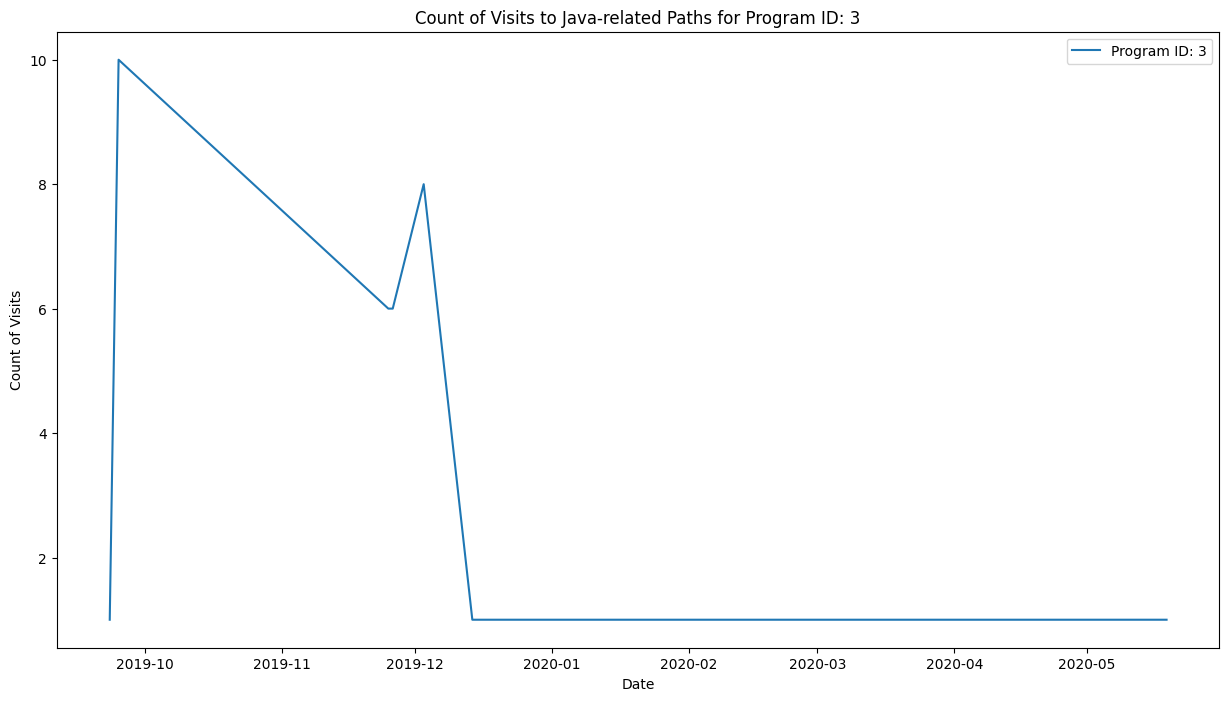

In [36]:
# Filter data for program_id 3
subset_program_id_3 = grouped_df[grouped_df['program_id'] == 3]

# Plot the data for program_id 3
plt.figure(figsize=(15, 8))
plt.plot(subset_program_id_3.index, subset_program_id_3['count'], label='Program ID: 3')
plt.xlabel('Date')
plt.ylabel('Count of Visits')
plt.title('Count of Visits to Java-related Paths for Program ID: 3')
plt.legend()
plt.show()

In [29]:
# Resample the data by week
grouped_df_resampled = grouped_df.groupby('program_id').resample('W').sum().reset_index()
grouped_df_resampled.head()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [ ]:
# Plot the resampled data
plt.figure(figsize=(15, 8))
for program_id in grouped_df_resampled['program_id'].unique():
    subset = grouped_df_resampled[grouped_df_resampled['program_id'] == program_id]
    plt.plot(subset['date'], subset['count'], label=f'Program ID: {program_id}')

plt.xlabel('Date')
plt.ylabel('Count of Visits (Resampled by Week)')
plt.title('Count of Visits to Java-related Paths by Program ID (Resampled by Week)')
plt.legend()
plt.show()

In [21]:
df_has_java.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 309075 entries, 2018-01-26 to 2021-04-21
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time        309075 non-null  object
 1   path        309075 non-null  object
 2   user_id     309075 non-null  int64 
 3   cohort_id   309075 non-null  int64 
 4   ip          309075 non-null  object
 5   name        309075 non-null  object
 6   slack       309075 non-null  object
 7   start_date  309075 non-null  object
 8   end_date    309075 non-null  object
 9   program_id  309075 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 25.9+ MB


In [30]:
# Pivot the DataFrame to have 'program_id' as separate columns
df_has_java_pivot = df_has_java.pivot(columns='program_id', values='path', aggfunc='count')

# Resample the pivoted DataFrame to a weekly frequency
df_has_java_weekly = df_has_java_pivot.resample('W').sum()

# Create a line chart for each program_id
plt.figure(figsize=(12, 6))
for program_id in df_has_java_weekly.columns:
    plt.plot(df_has_java_weekly.index, df_has_java_weekly[program_id], marker='o', linestyle='-', label=f'Program {program_id}')

plt.title('Count of Rows Each Week by Program ID')
plt.xlabel('Date')
plt.ylabel('Count of Rows')
plt.legend()
plt.grid(True)
plt.show()

TypeError: DataFrame.pivot() got an unexpected keyword argument 'aggfunc'

ValueError: 'program_id' is both an index level and a column label, which is ambiguous.

<Figure size 1200x600 with 0 Axes>

In [ ]:

plt.title('Count of Rows Each Week by Program ID')
plt.xlabel('Date')
plt.ylabel('Count of Rows')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
df_has_java_weekly = df_has_java.resample('W').count()
df_has_java_weekly

,time,path,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id
date,,,,,,,,,,
2018-01-28,445,445,445,445,445,445,445,445,445,445
2018-02-04,2167,2167,2167,2167,2167,2167,2167,2167,2167,2167
2018-02-11,1508,1508,1508,1508,1508,1508,1508,1508,1508,1508
2018-02-18,504,504,504,504,504,504,504,504,504,504
2018-02-25,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885
...,...,...,...,...,...,...,...,...,...,...
2021-03-28,2394,2394,2394,2394,2394,2394,2394,2394,2394,2394
2021-04-04,2296,2296,2296,2296,2296,2296,2296,2296,2296,2296
2021-04-11,2052,2052,2052,2052,2052,2052,2052,2052,2052,2052


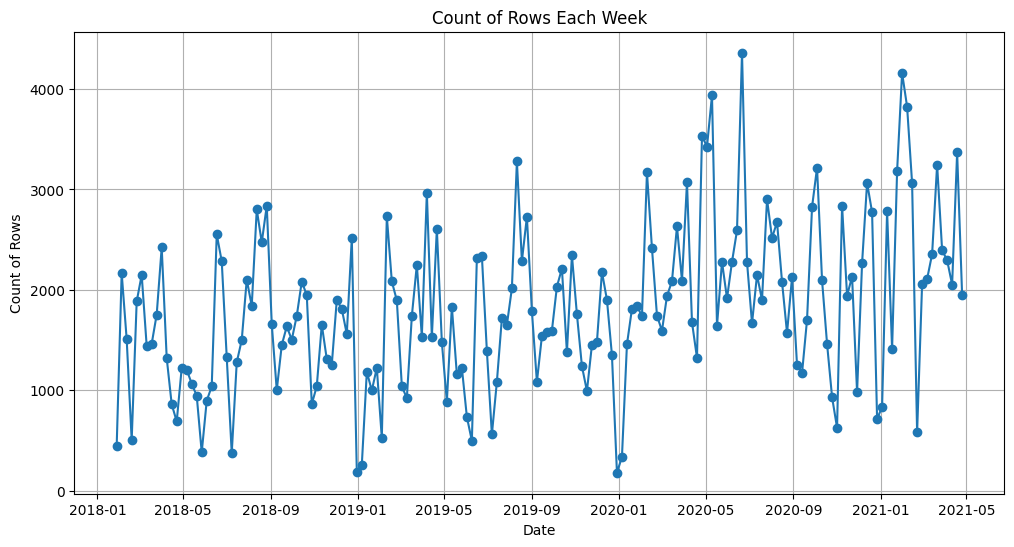

In [25]:
# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_has_java_weekly.index, df_has_java_weekly['path'], marker='o', linestyle='-')
plt.title('Count of Rows Each Week')
plt.xlabel('Date')
plt.ylabel('Count of Rows')
plt.grid(True)
plt.show()

In [ ]:

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_has_java_weekly.index, df_has_java_weekly['path'], marker='o', linestyle='-')
plt.title('Count of Rows Each Week')
plt.xlabel('Date')
plt.ylabel('Count of Rows')
plt.grid(True)
plt.show()


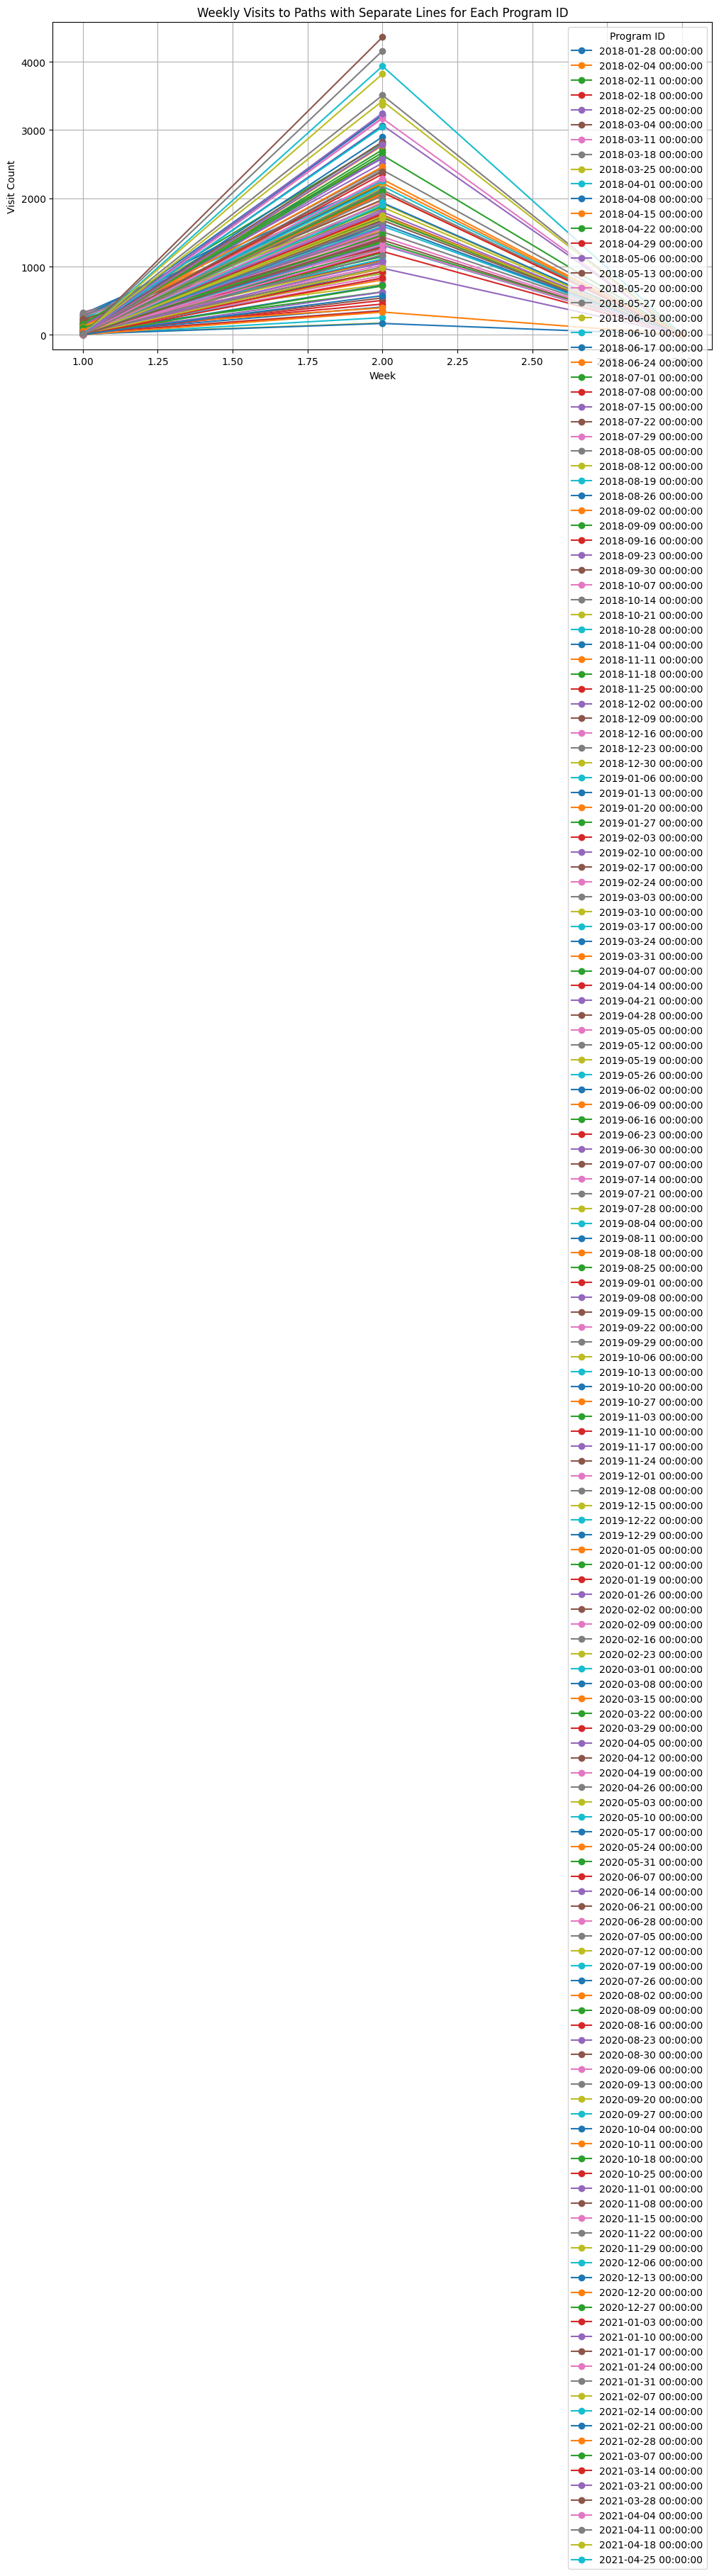

In [24]:
# Resample the data to weekly intervals and count visits for each program_id
visits_count = df_has_java.groupby('program_id').resample('W').size().unstack()

# Plot the line chart
visits_count.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Weekly Visits to Paths with Separate Lines for Each Program ID')
plt.xlabel('Week')
plt.ylabel('Visit Count')
plt.legend(title='Program ID')
plt.grid(True)
plt.show()

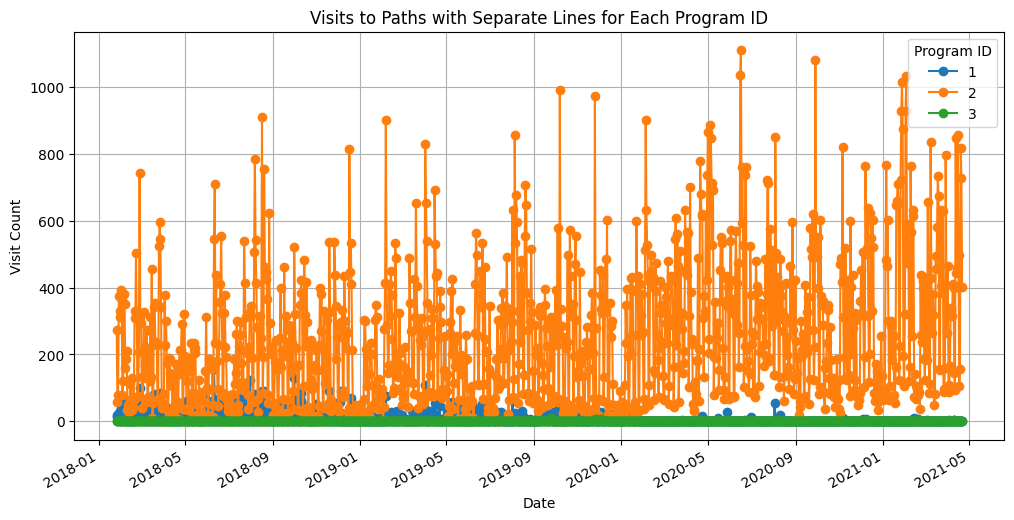

In [23]:
# Group the data by 'date' and 'program_id', then count the visits
visits_count = df_has_java.groupby(['date', 'program_id']).size().unstack().fillna(0)

# Plot the line chart
visits_count.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Visits to Paths with Separate Lines for Each Program ID')
plt.xlabel('Date')
plt.ylabel('Visit Count')
plt.legend(title='Program ID')
plt.grid(True)
plt.show()

In [20]:
traffic_program_full_path[traffic_program_full_path['program_id'] == 2].path[:20]

2198                                                                 javascript-i
2593                                                                          toc
2172                                                                     java-iii
2086                                                                     html-css
2160                                                                      java-ii
2484                                                                       spring
2261                                                                       jquery
2312                                                                        mysql
2151                                                                       java-i
2241                                                                javascript-ii
1429                                                                     appendix
2222    javascript-i/introduction/working-with-data-types-operators-and-variables
2349            

In [22]:
traffic_program_full_path[traffic_program_full_path['program_id'] == 3]

,program_id,path,visit_count
3020,3,classification/overview,1785
2628,3,1-fundamentals/1.1-intro-to-data-science,1633
3241,3,sql/mysql-overview,1424
3100,3,fundamentals/intro-to-data-science,1413
2813,3,6-regression/1-overview,1124
...,...,...,...
3271,3,storytelling/creating-custom-fields.md,1
3284,3,tidy-data,1
3299,3,understand,1
3301,3,viz.py,1


In [ ]:
len(traffic_program_full_path[traffic_program_full_path['program_id'] == 3])

624

In [11]:
df.head()

,date,time,path,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id
0,2018-01-26,09:55:03,/,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1
1,2018-01-26,09:56:02,java-ii,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2


In [ ]:
# Group by 'program_id' and 'path', then count the occurrences to identify the most visited lesson per program
high_trafic_program = df.groupby(['program_id', 'path']).size().reset_index(name='visit_count')
high_trafic_program= high_trafic_program[high_trafic_program['path'] != '/']
high_trafic_program.sort_values('visit_count', ascending=False).head(5)

,program_id,path,visit_count
2198,2,javascript-i,17457
2593,2,toc,17428
2444,2,search/search_index.json,15212
2172,2,java-iii,12683
2086,2,html-css,12569


In [ ]:
# List of common file extensions
file_extensions = ['.txt', '.jpg', '.jpeg', '.png', '.pdf', '.doc', '.xls', '.csv', '.json', '.html', '.svg', '.java', '.zip', '.gif', '.ico']

# Define a function to check if a URL contains a file extension
def contains_file_extension(url):
    for ext in file_extensions:
        if ext in url:
            return False
    return True

# Filter rows where the URL doesn't contain a file extension
high_trafic_program = high_trafic_program[high_trafic_program['path'].apply(contains_file_extension)]
high_trafic_program.sort_values('visit_count', ascending=False).head(5)

,program_id,path,visit_count
2198,2,javascript-i,17457
2593,2,toc,17428
2172,2,java-iii,12683
2086,2,html-css,12569
2160,2,java-ii,11719


In [16]:
# List of common file extensions
file_extensions = ['.txt', '.jpg', '.jpeg', '.png', '.pdf', '.doc', '.xls', '.csv', '.json', '.html', '.svg', '.java', '.zip', '.gif', '.ico']

# Define a function to check if a URL contains a file extension
def contains_file_extension(url):
    for ext in file_extensions:
        if ext in url:
            return False
    return True

# Filter rows where the URL doesn't contain a file extension
high_trafic = high_trafic[high_trafic['path'].apply(contains_file_extension)]
high_trafic.sort_values('visit_count', ascending=False).head(50)

,program_id,path,visit_count


In [ ]:
has_period = high_trafic[high_trafic['path'].astype(str).str.contains('\.')]
has_period[has_period['program_id'] == 3].head(20).sort_values('visit_count', ascending=False).head(5)

In [15]:
has_period = high_trafic[high_trafic['path'].astype(str).str.contains('\.')]
has_period[has_period['program_id'] == 3].head(20).sort_values('visit_count', ascending=False).head(5)

,program_id,path,visit_count
2642,3,1-fundamentals/modern-data-scientist.jpg,1655
2640,3,1-fundamentals/AI-ML-DL-timeline.jpg,1651
2628,3,1-fundamentals/1.1-intro-to-data-science,1633
2641,3,1-fundamentals/DataToAction_v2.jpg,675
2629,3,1-fundamentals/1.2-data-science-pipeline,651


In [17]:
# List of common file extensions
file_extensions = ['.txt', '.jpg', '.jpeg', '.png', '.pdf', '.doc', '.xls', '.csv', '.json', '.html', '.svg', '.java', '.zip', '.gif', '.ico']

# Define a function to check if a URL contains a file extension
def contains_file_extension(url):
    for ext in file_extensions:
        if ext in url:
            return False
    return True

# Filter rows where the URL doesn't contain a file extension
has_period = has_period[has_period['path'].apply(contains_file_extension)]
has_period.sort_values('visit_count', ascending=False).head(50)

,program_id,path,visit_count
2628,3,1-fundamentals/1.1-intro-to-data-science,1633
2629,3,1-fundamentals/1.2-data-science-pipeline,651
2801,3,5-stats/4.2-compare-means,556
726,2,1-fundamentals/1.1-intro-to-data-science,481
2828,3,6-regression/5.0-evaluate,440
2853,3,7-classification/6.1-logistic-regression,413
2832,3,6-regression/7.0-model,405
2803,3,5-stats/4.3-correlation,374
2800,3,5-stats/4.1-hypothesis-testing-overview,372
2818,3,6-regression/3.0-split-and-scale,351


In [14]:
jw.create_info_dataframe(df) 

,Column,Null_Count,Null_Percentage,Zero_Count,Blank_Count,Unique_Values,Data_Type
0,date,0,0.0,0,0,1182,object
1,time,0,0.0,0,0,72331,object
2,path,1,0.0,0,0,2224,object
3,user_id,0,0.0,0,0,911,int64
4,cohort_id,0,0.0,0,0,47,float64
5,ip,0,0.0,0,0,5200,object
6,id,0,0.0,0,0,47,float64
7,name,0,0.0,0,0,47,object
8,slack,0,0.0,0,0,46,object
9,start_date,0,0.0,0,0,44,object


In [10]:
df[df['path'] == '/']

,date,time,path,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
12,2018-01-26,10:00:37,/,6,22.0,97.105.19.61
30,2018-01-26,10:14:47,/,11,1.0,97.105.19.61
32,2018-01-26,10:14:53,/,6,22.0,97.105.19.61
39,2018-01-26,10:18:22,/,10,21.0,97.105.19.61
...,...,...,...,...,...,...
900115,2021-04-21,15:32:26,/,875,135.0,24.242.150.231
900125,2021-04-21,15:41:45,/,887,135.0,107.77.169.13
900151,2021-04-21,16:01:11,/,841,133.0,99.162.244.233
900153,2021-04-21,16:04:02,/,64,28.0,71.150.217.33


In [11]:
df.path.unique()

array(['/', 'java-ii', 'java-ii/object-oriented-programming', ...,
       'florence-python-assessment.html', 'javascript-i/dom',
       'appendix/professional-development/post-interview-review-form'],
      dtype=object)

In [12]:
max_slashes = df['path'].apply(lambda x: x.count('/')).max()
max_slashes

AttributeError: 'float' object has no attribute 'count'

In [14]:
# Now, let's filter the rows where the 'path' has more than 5 slashes.
df[df['path'].apply(lambda x: x.count('/')) > 5]


AttributeError: 'float' object has no attribute 'count'